In [8]:
from ultralytics import YOLO
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import time


0: 384x640 2 persons, 1 refrigerator, 57.8ms
Speed: 2.4ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


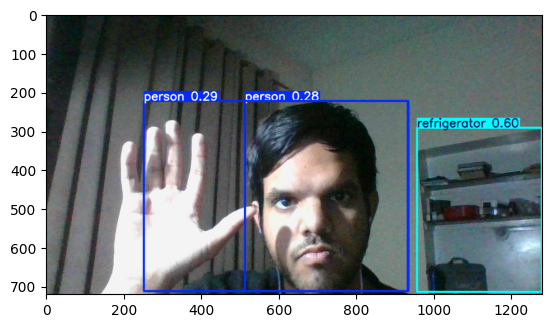

Ultralytics 8.3.107  Python-3.11.11 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)


val: Scanning C:\Users\Taimoor\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


                   all          4         17      0.621      0.833      0.888       0.63
                person          3         10      0.721        0.5      0.519      0.269
                   dog          1          1       0.37          1      0.995      0.597
                 horse          1          2      0.751          1      0.995      0.631
              elephant          1          2      0.505        0.5      0.828      0.394
              umbrella          1          1      0.564          1      0.995      0.995
          potted plant          1          1      0.814          1      0.995      0.895
Speed: 3.0ms preprocess, 88.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\val6


In [17]:
#Task 1 Segmentation
img = cv.imread("pic1.jpg")
seg_model = YOLO('yolov8n.pt')

pred = seg_model.predict(img)

plt.imshow(pred[0].plot()[:,:,::-1])
plt.show()

#Task 2 
metrics = seg_model.val(data = 'coco8.yaml')

In [18]:
#Task 3
cap = cv.VideoCapture(0)

width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float `width`
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)  # float `height`
writeto = cv.VideoWriter(r"C:\Users\Taimoor\out_cameras.mp4",  cv.CAP_FFMPEG, cv.VideoWriter.fourcc('X','V','I','D'), 20, np.uint32((width, height)))
i = 0

print("started")
start = time.time()
while ((time.time() - start) < 10):
    ret, img = cap.read()
    results = seg_model.predict(img)
    i = i + 1
    
    plot = results[0].plot()
    writeto.write(plot)



writeto.set(cv.CAP_PROP_FPS, int(i/10))
writeto.release()
cap.release()


started

0: 480x640 1 person, 1 dog, 54.5ms
Speed: 2.1ms preprocess, 54.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 dog, 58.4ms
Speed: 2.7ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 dog, 65.7ms
Speed: 1.4ms preprocess, 65.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 64.4ms
Speed: 1.6ms preprocess, 64.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 60.1ms
Speed: 1.3ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 62.4ms
Speed: 1.4ms preprocess, 62.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 65.5ms
Speed: 1.3ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 66.8ms
Speed: 1.8ms preprocess, 66.8ms inference, 0.7ms postprocess per image at shap